<a href="https://colab.research.google.com/github/singhabijeet83/OIBSIP/blob/main/oasis3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:

# Label Encoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Fuel_Type']= le.fit_transform(df['Fuel_Type'])
df['Selling_type']= le.fit_transform(df['Selling_type'])
df['Transmission']= le.fit_transform(df['Transmission'])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


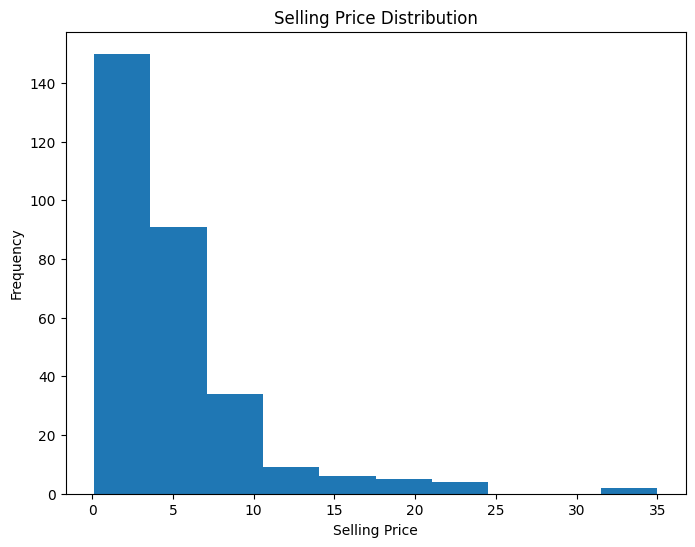

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df['Selling_Price'])
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Selling Price Distribution')
plt.show()


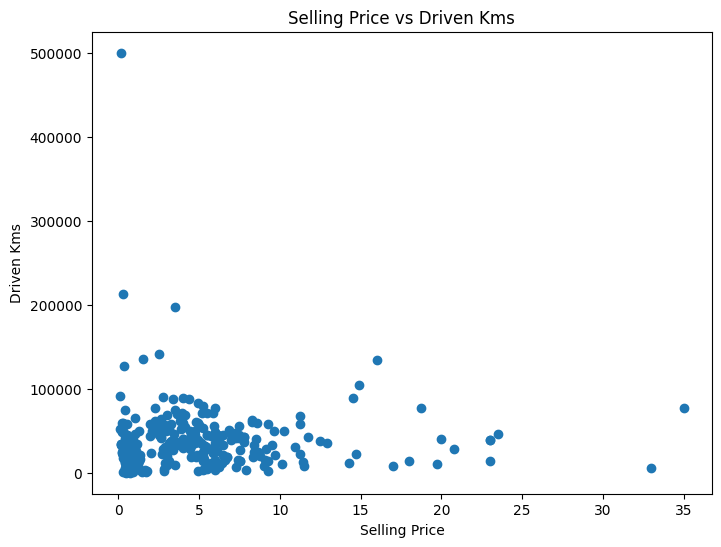

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['Selling_Price'], df['Driven_kms'])
plt.xlabel('Selling Price')
plt.ylabel('Driven Kms')
plt.title('Selling Price vs Driven Kms')
plt.show()

<Figure size 800x800 with 0 Axes>

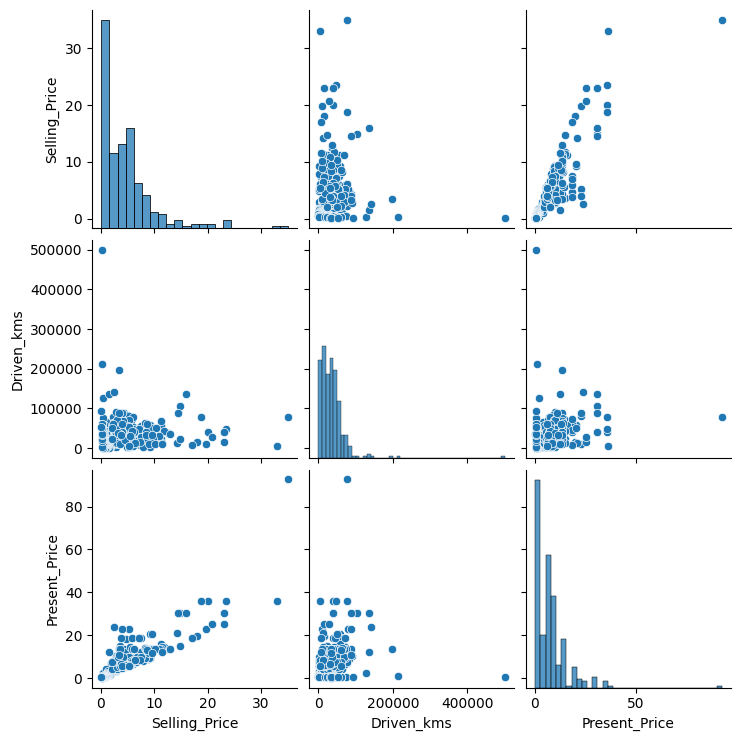

In [ ]:
df1= ['Selling_Price', 'Driven_kms','Present_Price']
data= df[df1]
plt.figure(figsize=(8,8))
sns.pairplot(data)
plt.show()


In [ ]:
x= df.drop('Selling_Price',axis=1)
y= df['Selling_Price']
df.drop('Car_Name',axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(df.drop('Selling_Price',axis=1),df['Selling_Price'],test_size=0.2,random_state=42)


In [ ]:

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
predictions= model.predict(x_test)
print(predictions)

[ 2.96562958  8.30085782  6.05782751 -1.46736816  9.25705687  7.03171029
  1.35032876  0.82691573  1.36987479  7.10758777  8.74146173  0.58642748
  8.50459253  3.42661966  6.50292735  3.08732011  0.46492161 10.89305942
  1.76225878  2.36483065  0.37623881  7.73151022  6.20981391  2.65038024
  0.78195056  3.72251099  5.3340761   2.84078903  2.15815992  1.77018609
  0.37934652  8.79022344 -0.69755203  2.30364091  8.21352459  4.54034656
  7.35264949  7.68532992  2.91820641  8.08316508  4.00325157  4.35384555
  4.36428366  0.60942277  6.94443091  0.47315352  7.41534765 11.442946
  3.14938081  4.95296902  6.86419835  2.19604944 20.53785454 16.78959932
  7.13843807  9.82975063  4.49877206  8.61930717  1.81754614  7.67258754
  0.21141592]


In [ ]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,predictions)
print(accuracy)


0.8466902419662664


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import r2_score
r2_score= r2_score(y_test,predictions)
print(r2_score)


0.8466902419662664


In [ ]:
from sklearn.linear_model import Lasso
lasso= Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [ ]:
from sklearn.metrics import r2_score
r2_score= r2_score(y_test,predictions)
print(r2_score)

0.8466902419662664
